# Practical Considerations With Correlation

The way we choose to numerical represent our data matters for the kinds of conclusions that we might be search for. "Featurization" is the process of taking real world, often tabular, and turning it into numerical values to calculate things like correlation.

# Instructor Evaluations
Below is a dataset collected from the University of Wisconsin-Madison on course evaluations, which are scored on a three point scale from (worst) 1-3 (best).

In [66]:
import pandas as pd

evals = pd.read_csv('tae.csv')

#some cleanup here so this fits in with our class notation
evals['Native-English'] =  evals['Native-English'] - 1
evals['Summer'] =  evals['Summer'] - 1

In [67]:
evals

,Native-English,Instructor-Id,Course-Id,Summer,Class-Size,Eval
0,0,23,3,0,19,3
1,1,15,3,0,17,3
2,0,23,3,1,49,3
3,0,5,2,1,33,3
4,1,7,11,1,55,3
...,...,...,...,...,...,...
146,1,3,2,1,26,1
147,1,10,3,1,12,1
148,0,18,7,1,48,1
149,1,22,1,1,51,1


## Question 1. How Does Class Size Correlate With Course Evaluations?
Our first question is to determine how class size correlates with course evaluations. What does this mean? A positive correlation means a bigger class tends to have better evaluations. First, let's visualize the data. In lecture, we used scatter plots to illustrate correlation:

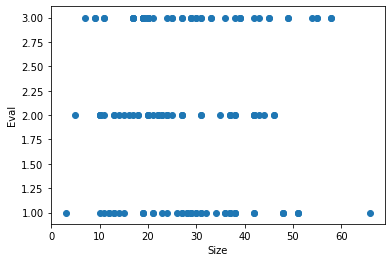

In [68]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

x = evals['Class-Size']
y = evals['Eval']

plt.scatter(x,y)
plt.xlabel('Size')
plt.ylabel('Eval')
plt.show()

What can you learn from this visualization? Is it informative? Does it illustrate the correlation? What would you do instead?

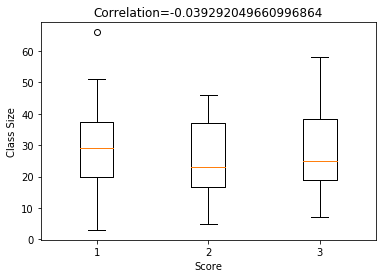

In [69]:
%matplotlib inline

corr = scipy.stats.pearsonr(x,y)[0]

evals1 = evals[evals['Eval']==1] #get all records where eval is 1
evals2 = evals[evals['Eval']==2] #get all records where eval is 2
evals3 = evals[evals['Eval']==3] #get all records where eval is 1

x1 = evals1['Class-Size']
x2 = evals2['Class-Size']
x3 = evals3['Class-Size']

plt.boxplot([x1,x2,x3])
plt.xlabel('Score')
plt.ylabel('Class Size')
plt.title('Correlation='+str(corr))
plt.show()

## How Are Non-Native Speakers Evaluated?
Next, we will evaluate the correlation of native english speaking instructors and high evaluations. So let's run our correlation code again:

In [84]:
x = evals['Native-English']
y = evals['Eval']
corr = scipy.stats.pearsonr(x,y)[0]
corr

-0.23004214744803078

Why is this correlation negative? Does this make sense?

The way that you choose to represent the data matters for correlation. Consider "flipping" the labels:

In [71]:
x_nonnative = (evals['Native-English'] == 0)*1.0
corr = scipy.stats.pearsonr(x_nonnative,y)[0]
corr

0.23004214744803078

How could Simpson's paradox affect these results?

## How Are Summer Courses Correlated With Evaluations?

We can run the same type of analysis on the other variables.

In [86]:
x = evals['Summer']
y = evals['Eval']
corr = scipy.stats.pearsonr(x,y)[0]
corr

-0.26018507492098036

We can also look at who tends to teach summer courses.

In [87]:
x = evals['Summer']
y = evals['Native-English']
corr = scipy.stats.pearsonr(x,y)[0]
corr

0.2144165369064166

Why would we want to do this analysis?

## Good Instructors or Good Courses?

Those correlations were easy and kind of intuitive. Here is a more complicated question: are positive evals indicative of good instructors or good courses?

How would you determine this?


We're going to compare the variation within a course v.s. the variation within an instructor.

In [72]:
#find all courses that have been taught a minimum number of times
thresh = 4
evals_sig_courses_mask = evals.groupby('Course-Id')['Course-Id'].count() > thresh
ids = set(evals_sig_courses_mask[evals_sig_courses_mask].index)
ids

{1, 2, 3, 5, 7, 11, 15, 17}

In [73]:
evals_sig_courses = evals[evals['Course-Id'].isin(ids)]
evals_sig_courses.groupby('Course-Id')['Eval'].agg(['var', 'count']) #the variation within a course

,var,count
Course-Id,,
1,0.708791,14
2,0.783333,16
3,0.734343,45
5,0.000000,5
7,0.285714,7
11,0.611111,9
15,0.544444,10
17,0.266667,10


We can do the same thing for instructors

In [74]:
#find all instructors that have been taught a minimum number of times
thresh = 5
evals_sig_inst_mask = evals.groupby('Instructor-Id')['Instructor-Id'].count() > thresh
ids = set(evals_sig_inst_mask[evals_sig_inst_mask].index)
ids

{5, 6, 7, 9, 10, 13, 14, 15, 18, 22, 23}

In [75]:
evals_sig_inst = evals[evals['Instructor-Id'].isin(ids)]
evals_sig_inst.groupby('Instructor-Id')['Eval'].agg(['var', 'count']) #the variation within a course

,var,count
Instructor-Id,,
5,1.066667,6
6,0.285714,8
7,0.490909,11
9,0.267857,8
10,1.071429,8
13,0.840659,14
14,0.696429,8
15,0.785714,8
18,0.553571,8


In [81]:
inst_variation = evals_sig_inst.groupby('Instructor-Id')['Eval'].agg(['var']).mean()
course_variation = evals_sig_courses.groupby('Course-Id')['Eval'].agg(['var']).mean()

print('Variation Within Instructors', float(inst_variation))
print('Variation Within Course', float(course_variation))

Variation Within Instructors 0.6679137262024963
Variation Within Course 0.49180056055056054


## Binning Numerical Variables

Sometimes even numerical data is a little unweildy. Consider the following dataset that correlates Age with an Alzheimer Indicator:

In [88]:
df = pd.read_csv('alz.csv', delimiter=' ')
df[:5]

,Age,Ind
0,48,0.194743
1,56,0.363772
2,58,1.155571
3,46,0.995018
4,62,0.679212


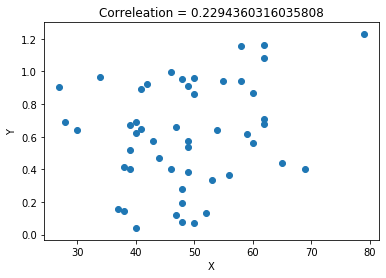

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt

corr = scipy.stats.pearsonr(df['Age'],df['Ind'])[0]

plt.scatter(df['Age'],df['Ind'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Correleation = '+ str(corr))
plt.show()

In [90]:
df['Age_binned'] = pd.cut(df['Age'], bins=4)
df[:5]

,Age,Ind,Age_binned
0,48,0.194743,"(40.0, 53.0]"
1,56,0.363772,"(53.0, 66.0]"
2,58,1.155571,"(53.0, 66.0]"
3,46,0.995018,"(40.0, 53.0]"
4,62,0.679212,"(53.0, 66.0]"


In [91]:
bins = pd.IntervalIndex.from_tuples([(0, 55), (55, 100)])
df['Age_binned'] = pd.cut(df['Age'], bins=bins)
df[:5]

,Age,Ind,Age_binned
0,48,0.194743,"(0, 55]"
1,56,0.363772,"(55, 100]"
2,58,1.155571,"(55, 100]"
3,46,0.995018,"(0, 55]"
4,62,0.679212,"(55, 100]"


In [92]:
bins = pd.IntervalIndex.from_tuples([(0, 40), (40, 54), (55,70), (70,100)])
df['Age_binned'], bins = pd.cut(df['Age'], bins=bins,retbins=True)
df[:5]

,Age,Ind,Age_binned
0,48,0.194743,"(40, 54]"
1,56,0.363772,"(55, 70]"
2,58,1.155571,"(55, 70]"
3,46,0.995018,"(40, 54]"
4,62,0.679212,"(55, 70]"


In [93]:
for b in bins:
    corr = scipy.stats.pearsonr(1.0*(df['Age_binned'] == b),df['Ind'])[0]
    print("Bin:", b, 'Corr=', corr )

Bin: (0, 40] Corr= -0.15927303133530316
Bin: (40, 54] Corr= -0.1889297871800505
Bin: (55, 70] Corr= 0.24388835227035674
Bin: (70, 100] Corr= 0.2786272366517293


## Dealing With String Data
Sometimes your data isn't numerical or categorical and it is simply string data like free form comments etc. Refer to the following references:

* https://en.wikipedia.org/wiki/Bag-of-words_model
* https://en.wikipedia.org/wiki/Tf%E2%80%93idf
* https://en.wikipedia.org/wiki/Word2vec

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = [
     'This is the first document.',
     'This is the second second document.',
     'And the third one.',
    'Is this the first document?']

X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [50]:
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [51]:
vectorizer = CountVectorizer(stop_words='english', min_df=2)
corpus = [
     'The quick brown fox jumped over the lazy dog',
     'The dog and the fox are friends',
     'The fox likes the dog and the moon',
    'The cow jumped over the moon',
    'Cow under the moon',
    'The cow and the moon']

X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()

['cow', 'dog', 'fox', 'jumped', 'moon']

In [52]:
X.toarray()

array([[0, 1, 1, 1, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1]])

In [55]:
import numpy as np
R = np.corrcoef(X.toarray().T)


for i, namei in enumerate(vectorizer.get_feature_names()):
    for j, namej in enumerate(vectorizer.get_feature_names()):
        
        if np.abs(R[i,j]) < 0.25 and i > j:
            print(namei, namej, R[i,j])
    

jumped cow 0.0
jumped dog 0.0
jumped fox 0.0
moon jumped -0.24999999999999994
